
# **Implement the Harris algorithm using OpenCV. **

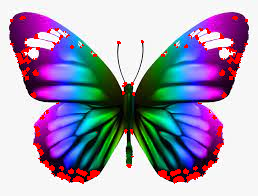

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def harris_corner_detection(image, ksize=3, k=0.04, threshold=0.01):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = np.float32(gray_image)

    # Calculate derivatives using Sobel operator
    dx = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0, ksize=ksize)
    dy = cv2.Sobel(gray_image, cv2.CV_32F, 0, 1, ksize=ksize)

    # Calculate Harris corner response function
    harris_response = cv2.cornerHarris(src=gray_image, blockSize=ksize, ksize=3, k=k)

    # Mark the corners using a threshold
    image[harris_response > threshold * harris_response.max()] = [0, 0, 255]

    return image

# Load the image
image_path = 'b1.jpeg'
image = cv2.imread(image_path)

# Apply Harris corner detection
result_image = harris_corner_detection(image)

# Display the result
cv2_imshow( result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Implement Image Pyramid using OpenCV**

Level 0


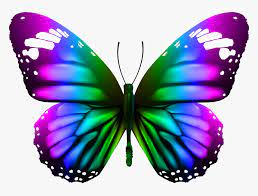

Level 1


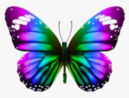

Level 2


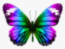

In [4]:
import cv2
from google.colab.patches import cv2_imshow

def image_pyramid(image, levels=3, scale_factor=0.5):
    """
    Generate an image pyramid by downscaling the input image.

    Parameters:
        image (numpy.ndarray): The input image in NumPy array format.
        levels (int): The number of pyramid levels to generate.
        scale_factor (float): The scaling factor to resize the image at each level.

    Returns:
        list: A list containing the image pyramid at different levels.
    """
    pyramid = [image]  # Initialize the pyramid with the original image

    for i in range(1, levels):
        image = cv2.pyrDown(image)  # Downscale the image using Gaussian pyramid
        pyramid.append(image)

    return pyramid

if __name__ == "__main__":
    # Load the image from file (replace '/content/harris_corner_image.jpg' with the actual path)
    image = cv2.imread('b1.jpeg')

    # Specify the number of pyramid levels (default is 3)
    levels = 3

    # Specify the scale factor for resizing the image (default is 0.5)
    scale_factor = 0.5

    # Generate the image pyramid
    pyramid = image_pyramid(image, levels, scale_factor)

    # Display the images from the pyramid (for demonstration purposes)
    for i, pyr_image in enumerate(pyramid):
        print(f"Level {i}")
        cv2_imshow(pyr_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


#  Implement the SURF algorithm using OpenCV**

ORB Detection


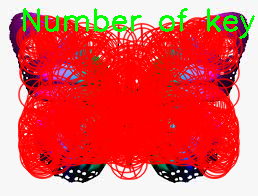

In [15]:
import cv2
from google.colab.patches import cv2_imshow

def orb_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create ORB object and detect keypoints
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray_image, None)

    # Draw the keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return image_with_keypoints, len(keypoints)

# Load the image and perform ORB detection
image_path = 'b1.jpeg'
result_image, num_keypoints = orb_detection(image_path)

# Add text to the image indicating the number of keypoints
text = f"Number of keypoints: {num_keypoints}"
cv2.putText(result_image, text, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the result
print('ORB Detection')
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


#  Implement SIFT algorithm using OpenCV.**


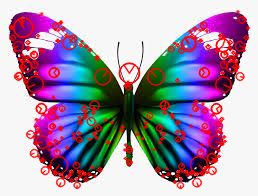

In [5]:
import cv2
from google.colab.patches import cv2_imshow

def sift_detection(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create SIFT object and detect keypoints
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Draw the keypoints on the image
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    return image_with_keypoints, keypoints

# Load the image and perform SIFT detection
image_path = 'b1.jpeg'
result_image, keypoints = sift_detection(image_path)

# Display the result with a title
title = 'SIFT Detection'
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Implement object detection using YOLO on the COCO dataset. Provide the results for any 5 images (for testing purposes) from the dataset.**

In [7]:
pip install opencv-python


In [8]:
# Download the YOLOv3 configuration and weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights

# Download the COCO dataset class names
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2023-08-03 17:36:32--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-08-03 17:36:32 (55.6 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2023-08-03 17:36:32--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  72.6MB/s    in 3.5s    

2023-08-03 17

In [9]:
!cat coco.names | wc -l

80


In [10]:
!cat coco.names | head

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light


In [11]:
!wget -O yolov3.weights https://pjreddie.com/media/files/yolov3.weights


--2023-08-03 17:36:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  81.1MB/s    in 2.9s    

2023-08-03 17:36:53 (81.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



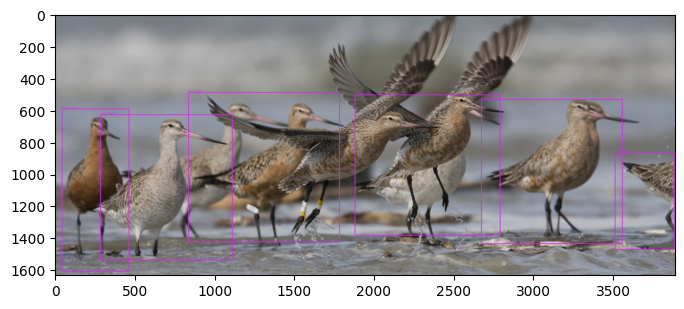

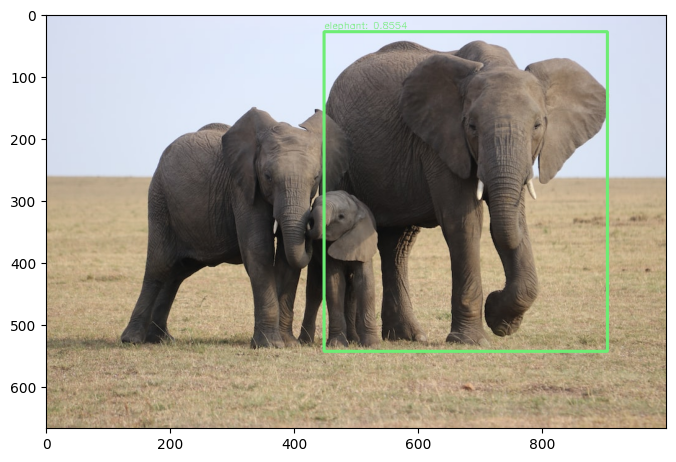

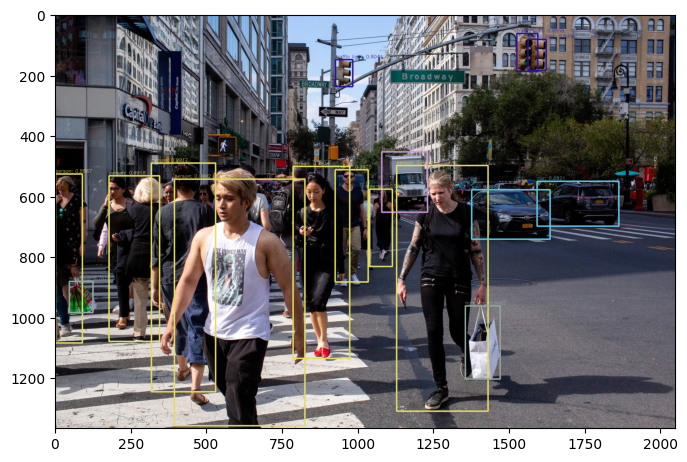

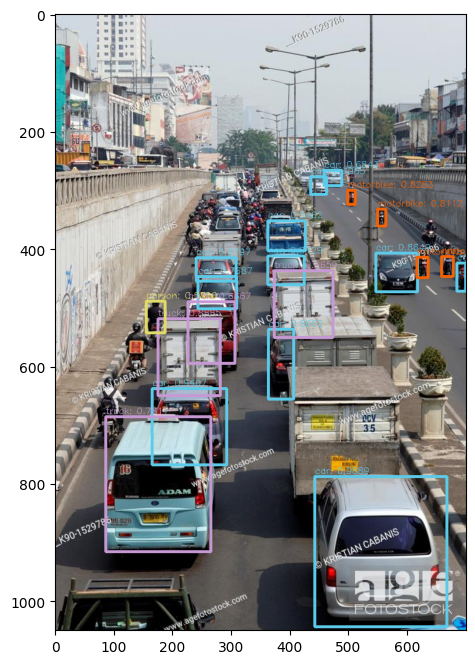

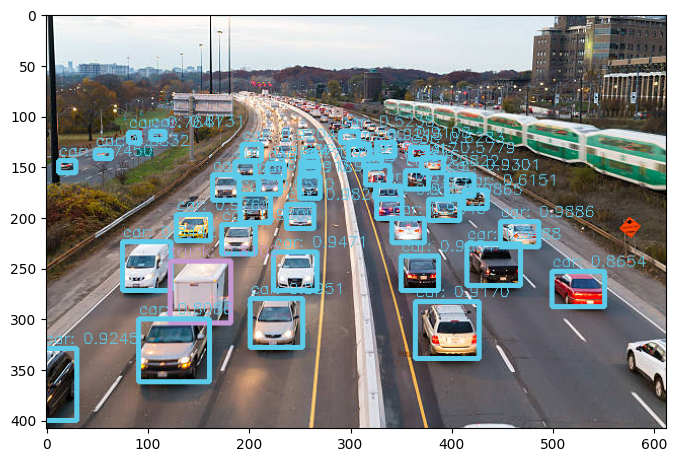

In [15]:
import cv2
import numpy as np
import os
import time
from matplotlib import pyplot as plt

def detect_and_draw_objects(image_path):
    # Read the image from the specified path.
    img = cv2.imread(image_path)

    # Load names of classes and generate random colors for each class.
    classes = open('coco.names').read().strip().split('\n')
    np.random.seed(42)
    colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

    # Load YOLOv3 model and set it to use OpenCV backend.
    net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
    net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

    # Get output layer names.
    layer_names = net.getLayerNames()
    output_layer_indices = net.getUnconnectedOutLayers()

    # Convert output layer indices to layer names.
    output_layers = [layer_names[i - 1] for i in output_layer_indices]

    # Preprocess the image and get the detections.
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(output_layers)

    # Process the detections and draw bounding boxes around objects.
    boxes = []
    confidences = []
    classIDs = []
    h, w = img.shape[:2]

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.5:
                box = detection[:4] * np.array([w, h, w, h])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                box = [x, y, int(width), int(height)]
                boxes.append(box)
                confidences.append(float(confidence))
                classIDs.append(classID)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels for the detected objects.
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in colors[classIDs[i]]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 4)
            text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
            cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return img

# Process 5 images and display the results using Matplotlib.
img_paths = ['birds.jpg', 'elephant.jpeg', 'street.jpg', 't2.jpg', 'traffic.jpg']

for img_path in img_paths:
    processed_img = detect_and_draw_objects(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.show()
